<a href="https://colab.research.google.com/github/karinaah/NLP-inicios/blob/main/script_oficial_consolidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import altair as alt
#from vega_datasets import data
import pandas as pd
from requests import Session
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import scipy
from scipy import stats
##!pip install -U scipy
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.interpolate
import scipy.stats.mstats

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import warnings

In [ ]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display #para mostrar más de un elemento por celda de Jupyter
import numpy as np
import pandas as pd
###from plotnine import *
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
###from outliers import smirnov_grubbs as grubbs
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

###instalacion todas las librerias
##!pip install scikit-learn==1.0
##!pip install xgboost
#!pip install yellowbrick

##!pip uninstall scipy
##!pip install -U scipy
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import sklearn.metrics as metrics
import seaborn as sns
#!pip install -U scikit-fuzzy
import skfuzzy as fuzz
import numpy as np
import pandas as pd
import warnings

In [ ]:
pd.options.display.max_columns = None
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
df = pd.read_csv("data.csv")
display(df.head(10))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


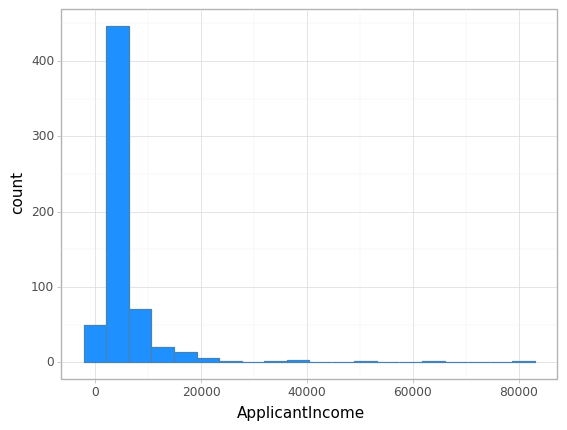

<ggplot: (8771854257908)>

In [ ]:
ggplot(df)+ aes(x = "ApplicantIncome") + geom_histogram(bins = 20, fill = "dodgerblue", color = "steelblue")+ theme_light()

deteccion de outlier

In [ ]:
# Estandarización de las variables
data_outliers = df
#data_outliers.sqft_basement[data_outliers.sqft_basement == 0] = None
std_scaler = StandardScaler()
data_std = pd.DataFrame(std_scaler.fit_transform(data_outliers[["ApplicantIncome","CoapplicantIncome"]]))
data_std["ID"] = data_outliers.index
data_std.columns = ["ApplicantIncome","CoapplicantIncome", "ID"]

data_std_melt = pd.melt(data_std, id_vars=["ID"], value_vars=["ApplicantIncome","CoapplicantIncome"])
data_std_melt

,ID,variable,value
0,0,ApplicantIncome,0.072991
1,1,ApplicantIncome,-0.134412
2,2,ApplicantIncome,-0.393747
3,3,ApplicantIncome,-0.462062
4,4,ApplicantIncome,0.097728
...,...,...,...
1223,609,CoapplicantIncome,-0.554487
1224,610,CoapplicantIncome,-0.554487
1225,611,CoapplicantIncome,-0.472404
1226,612,CoapplicantIncome,-0.554487


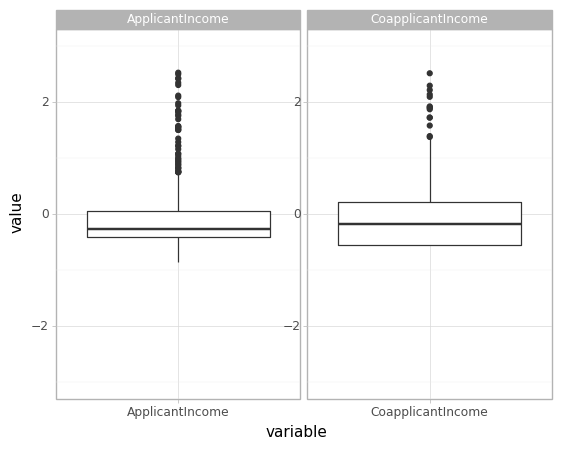

<ggplot: (8771854259083)>

In [ ]:
BoxPlots = ggplot(data_std_melt)+aes(x = "variable", y = "value")+ geom_boxplot()+theme_light()+scale_y_continuous(limits = [-3,3])
BoxPlots + facet_wrap("variable", scales = "free")

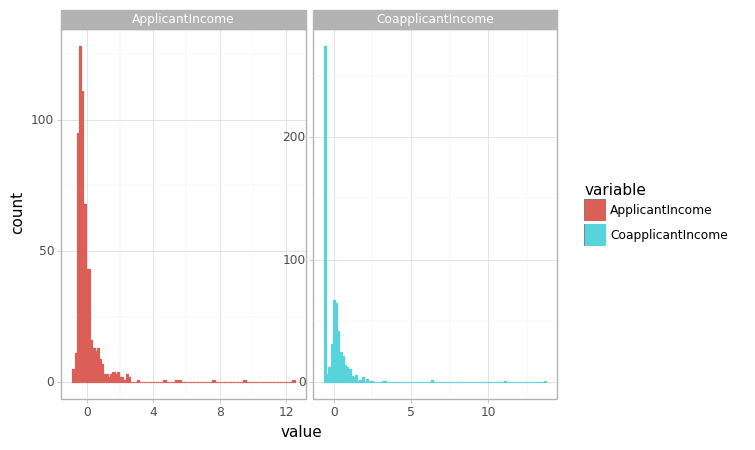

<ggplot: (8771852070024)>

In [ ]:
Histogramas = ggplot(data_std_melt)+aes(x = "value", fill = "variable", color = "variable") + geom_histogram(bins = 100)+ theme_light()+ facet_wrap("variable", scales = "free")
Histogramas

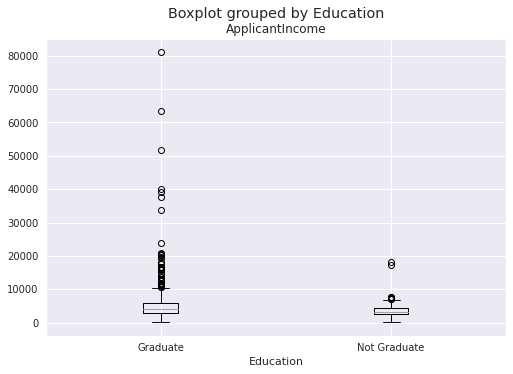

In [ ]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

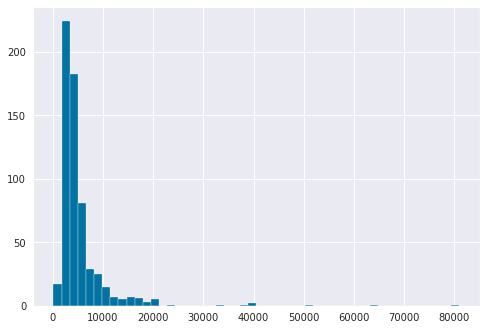

In [ ]:
df['ApplicantIncome'].hist(bins=50)
plt.show()

In [ ]:
data = df.copy()
##ver columnas
data.columns
# Describirlas
data.describe()

###Verificar datos nulos dataframe entero

b= data.isnull().sum(axis=0)
b= pd.DataFrame(b, columns=['nulos'])
dff = b.rename_axis('index').reset_index()
dff.head(10)

,index,nulos
0,Loan_ID,0
1,Gender,13
2,Married,3
3,Dependents,15
4,Education,0
5,Self_Employed,32
6,ApplicantIncome,0
7,CoapplicantIncome,0
8,LoanAmount,22
9,Loan_Amount_Term,14


In [ ]:
############NO EJECUTADA
# Índice como ID
data.index = data["id"]
#reemplazar nombre columna 
data = data.rename(columns={'Name': 'Nombre'})
##reemplazar valor dentro de  una columna 
data['Name'] = data['Loan_Status'].replace('L. Messi','Apache Spark')
##verificar que tipo de datos son
data.dtypes
##transformar datos
data['marca'] = pd.to_numeric(data['marca'])

In [ ]:
df['Credit_History'] =  df['Loan_Status'].replace('Y',1)
df['Credit_History'] =  df['Credit_History'].replace('N',0)

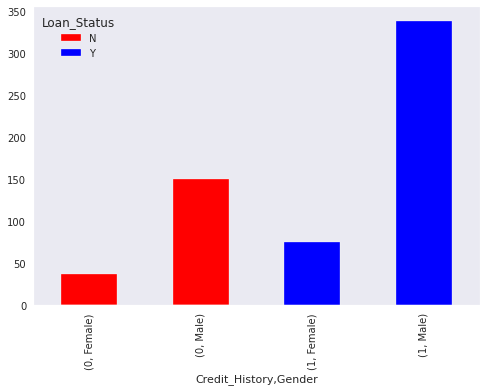

In [ ]:
temp4 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()

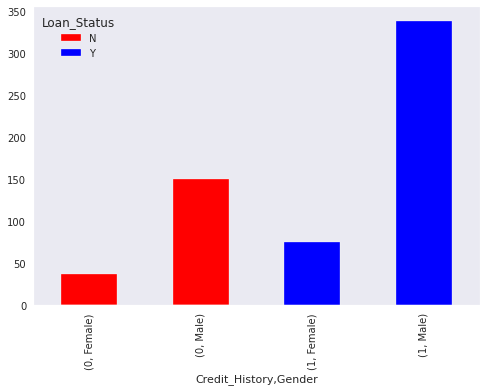

In [ ]:
temp4 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()

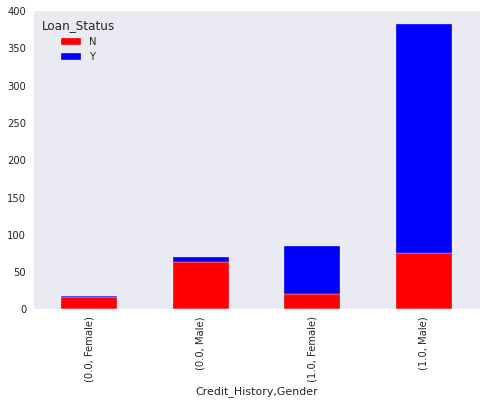

In [ ]:
temp4 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()

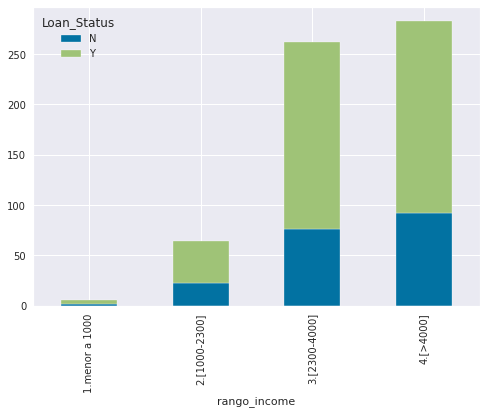

In [ ]:
conditions = [
              (df['ApplicantIncome']<1000), 
              (df['ApplicantIncome']>=1000) & (df['ApplicantIncome']<2300),
              (df['ApplicantIncome']>=2300) & (df['ApplicantIncome']<4000),
              (df['ApplicantIncome']>=4000)
              ]

values = ['1.menor a 1000', '2.[1000-2300]', '3.[2300-4000]', '4.[>4000]']
df['rango_income'] = np.select(conditions,values)
pd.crosstab(df['rango_income'], df['Loan_Status']).plot.bar(stacked =True)

In [ ]:
datos = df[df.Education.isin(['Graduate'])]
##datos = datos[datos.pais.isin(['Brasil', 'Cuba', 'Japón', 'Haití', 'África'])]

alt.Chart(datos).mark_bar().encode(
    alt.X('Gender:N', axis=alt.Axis(title='')),
    alt.Y('mean(ApplicantIncome):Q'),
    color=alt.Color('Gender:N'),
    column='Property_Area:O'
)

alt.Chart(...)

In [ ]:
import altair as alt
from vega_datasets import data

source = df.copy()

alt.Chart(source).mark_circle().encode(
    x=alt.X('ApplicantIncome', scale=alt.Scale(zero=False)),
    y='Loan_Amount_Term',
)

alt.Chart(...)

In [ ]:

alt.Chart(df).mark_line().encode(
    x='ApplicantIncome',
    y='count(Gender):Q',
    color='Gender:N'
)

alt.Chart(...)

In [ ]:
import altair as alt
from altair.expr import datum, if_
from vega_datasets import data
source = data.population.url
data = pd.read_json(source)

alt.Chart(data).mark_bar(stroke='blue').encode(
    alt.X('gender:N', axis=alt.Axis(title='')),
    alt.Y('sum(people):Q', axis=alt.Axis(title='population', grid=True)),
    color=alt.Color('gender:N', scale=alt.Scale(range=["#EA98D2", "#659CCA"])),
    column='age:O'
).transform_filter(datum.year == 2000
).transform_calculate('gender', if_(datum.sex == 2, 'Female', 'Male'))

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.Color('Gender:N'),
    alt.X('Education:N'),
    y='sum(ApplicantIncome):Q',
)

alt.Chart(...)

In [ ]:
import altair as alt
from vega_datasets import data

weather = data.seattle_weather()

alt.Chart(weather).mark_bar().encode(
    alt.Color('weather:N',
        legend=alt.Legend(title='Weather type'),
        scale=alt.Scale(
            domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
            range=['#e7ba42', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd']
        ),
    ),
    alt.X('month(date):N', axis=alt.Axis(title='Month of the Year')),
    y='count()',
)

alt.Chart(...)

EDA

In [ ]:
def edanumerico(df):
    estadistico_index=['mínimo','máximo','std','P25','P50','P75', 'P01', 'P99','N_P01','N_P99',
                       'N','kurtosis', 'skewness','missing_values']
    min=[]
    max=[]
    std=[]
    P25=[]
    P50=[]
    P75=[]
    P01=[]
    P99=[]
    N_P01=[]
    N_P99=[]
    N=[]
    kurt=[]
    skew=[]
    na=[]
    estadistico_column=[]
    for column in df.columns:
        if (df[column].dtype in [np.float64, np.int64]):
            min.append(df[column].min())
            max.append(df[column].max())
            std.append(df[column].std())
            P25.append(stats.mstats.mquantiles(df[column], prob=0.25)[0])
            P50.append(stats.mstats.mquantiles(df[column], prob=0.50)[0])
            P75.append(stats.mstats.mquantiles(df[column], prob=0.75)[0])
            P01.append(stats.mstats.mquantiles(df[column], prob=0.01)[0])
            P99.append(stats.mstats.mquantiles(df[column], prob=0.99)[0])
            N_P01.append(df[column].loc[df[column].isin([np.quantile(df[column],0.01)])].count())
            N_P99.append(df[column].loc[df[column].isin([np.quantile(df[column],0.99)])].count())
            N.append(df[column].shape[0])
            kurt.append(stats.kurtosis(df[column]))
            skew.append(stats.skew(df[column]))
            na.append(df[column].isna().count())
            estadistico_column.append(column)
    EDA_Numerico = pd.DataFrame([min, max, std, P25, P50, P75, P01, P99, N_P01, N_P99, N, kurt, skew, na], index = estadistico_index, columns= estadistico_column)        
    EDA_Numerico = EDA_Numerico.transpose()
    return EDA_Numerico

In [ ]:
edanumerico(df)

,mínimo,máximo,std,P25,P50,P75,P01,P99,N_P01,N_P99,N,kurtosis,skewness,missing_values
ApplicantIncome,150.0,81000.0,6109.041673,2875.95,3812.5,5800.75,1013.55,35619.834,2.0,0.0,614.0,60.039040,6.523526,614.0
CoapplicantIncome,0.0,41667.0,2926.248369,0.00,1188.5,2302.20,0.00,9890.504,273.0,0.0,614.0,84.256377,7.473217,614.0
LoanAmount,9.0,700.0,85.587325,100.00,129.0,175.00,30.00,NaN,0.0,0.0,614.0,NaN,NaN,614.0
Loan_Amount_Term,12.0,480.0,65.120410,360.00,360.0,360.00,84.00,NaN,0.0,0.0,614.0,NaN,NaN,614.0
Credit_History,0.0,1.0,0.463973,0.00,1.0,1.00,0.00,1.000,192.0,422.0,614.0,-1.347107,-0.808018,614.0


In [ ]:
###TABLAS DINAMICAS
##filtros
datos = censo[(censo.parentesco == "Jefe/a de hogar") & (censo.n_educacional != 98)]
datos = datos.groupby(["pais", "n_educacional"], as_index=False).edad.mean()
datos.head(10)



##Tratamientos datos atipicos

##valores atipicos tratarlos con logaritmo
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
plt.show()


In [ ]:
##todas las columnas excepto una
df = df[df.columns.difference(['zipcode'])]


###filtrar 
censo[censo.pais == "México"].count()
censo[censo.pais.isin(["Japón", "Alemania"])].count()

##funcion agreacion group by 
censo.groupby("n_educacional").count()

###sumar dos filas 
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [ ]:
####correlaciones entre variables
def corr_feature_detect(data, threshold=0.7):
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack()
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1','feature2','corr']
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                    correlated_block.feature2.unique()) + [feature]
            correlated_groups.append(correlated_block)
    return correlated_groups

df= data.copy()
a= corr_feature_detect(df, threshold=0.7)
aa=pd.concat(a)
aa.to_excel('hola.xlsx')


###correlacion entre x e Y 
corre = X.corrwith(y)
df_corre = pd.DataFrame(corre, columns=['correlacion'])
df_corre.sort_values(by='correlacion', ascending= False)
df_corre.to_exce('hola2.xlsx')


In [ ]:
##grafico correlaciones map
matriz = df.corr(method = 'pearson')
matriz_hm = matriz.style.background_gradient(cmap='coolwarm')
matriz_hm

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,-0.021268
Credit_History,-0.004710,-0.059187,-0.037318,-0.021268,1.000000


In [ ]:
###promedio por vaibale target
## Make a average table from the DataFrame SOLO FUNCIONA CON MARCA BINARIA
average = df_downsampled.groupby('marca')[colnumericas].apply(lambda x : np.mean(x,axis=0)).T

## Make a new Dataframe from the previous result
average= pd.DataFrame({
	'Var_numerica': average.index.to_list(),
	'Target0_AVG': average[0],
	'Target1_AVG': average[1],
	'AVG_Diff': np.abs((average[0]-average[1])/average[0])
}).reset_index(drop=True)

## Case Median (P50)
median = df_downsampled.groupby(['marca'])[colnumericas].median().T
median=pd.DataFrame({
	'Var_numerica': median.index.to_list(),
	'Target0_P50': median[0],
	'Target1_P50': median[1],
	'P50_Diff': np.where(np.abs((median[0]-median[1])/median[0]) == np.inf, 0, np.abs((median[0]-median[1])/median[0]))
}).reset_index(drop=True)

EDA_Numeric=pd.merge(left=average,
                     right=median,
                     how='left',
                     on='Var_numerica').sort_values('AVG_Diff', ascending = False).reset_index().drop('index', axis=1)

EDA_Numeric.head(20).style.background_gradient(subset=['AVG_Diff'],cmap='coolwarm')

In [ ]:
###igualar clases
from sklearn.utils import resample
df_minority = df[df.marca==1]
len(df_minority)
df_majority = df[df.marca==0]
len(df_majority)
df_majority_downsample = resample(df_majority,
                                  replace=False,
                                  n_samples = 40929,
                                  random_state=923)
df_downsampled  = pd.concat([df_majority_downsample, df_minority])
df_downsampled.marca.value_counts()
x_x = df_downsampled[df_downsampled.columns.difference(['marca','periodo','fecha'])]
X_train = x_x
y_train = df_downsampled['marca']

In [ ]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

###se debe transformar antes
train, test = train_test_split(data, test_size = 0.30)
X_train = train[cols] 
X_test  = test[cols] 
y_train = train['species']
y_test  = test['species']

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print ('The accuracy of this model is %0.4f' %round(model.score(X_train, y_train), 4))

plt.figure(figsize=(8,6))
probs1 = model.predict_proba(X_test)
preds1 = probs1[:, 1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.title('Curva ROC Xgboost',fontsize=15)
plt.plot(fpr1, tpr1, 'b', label='AUC=%0.4f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

In [ ]:
###tablas dinamicas
conditions = [
              (df['ApplicantIncome']<1000), 
              (df['ApplicantIncome']>=1000) & (df['ApplicantIncome']<2300),
              (df['ApplicantIncome']>=2300) & (df['ApplicantIncome']<4000),
              (df['ApplicantIncome']>=4000)
              ]

values = ['1.menor a 1000', '2.[1000-2300]', '3.[2300-4000]', '4.[>4000]']
df['rango_income'] = np.select(conditions,values)
pd.crosstab(df['rango_income'], df['Loan_Status']).plot.bar(stacked =True)



datos = censo[(censo.parentesco == "Jefe/a de hogar") & (censo.n_educacional != 98)]
datos = datos.groupby(["pais", "n_educacional"], as_index=False).edad.mean()
datos.head(10)


###datos unicos  por comunas
comunas = censo.comuna.unique()
comunas_dataframe = pd.DataFrame(comunas)
comunas_dataframe.shape

##contar los que llegaron antes del 2010
censo[censo.a_llegada < 2010].count()
##contar los que son diferentes a esas comunas
censo[~censo.comuna.isin(["Macul", "Puente Alto"])].count()



datos = censo[censo.comuna.isin(['Valdivia', 'Puente Alto', 'Viña del Mar'])]
datos = datos[datos.pais.isin(['Brasil', 'Cuba', 'Japón', 'Haití', 'África'])]

alt.Chart(datos).mark_bar().encode(
    alt.X('comuna:N', axis=alt.Axis(title='')),
    alt.Y('mean(edad):Q'),
    color=alt.Color('comuna:N'),
    column='pais:O'
)